In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from sklearn.cluster import KMeans

# Read jpg file 
* conver a .jpg or .png --> numpy array
* mp.img.imread convert the img to numpy array
* plt.imshow need numpy array so we use mp.img.imread to convert it to numpy array

In [2]:
img_array = mpimg.imread("palm-trees.jpg")
img_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [4]:
img_array.shape # height,width,color channel

(1401, 934, 3)

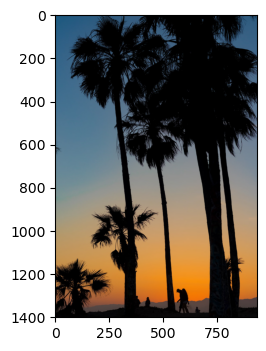

In [8]:
plt.figure(dpi=100)
plt.imshow(img_array);

### objective 
* convert 3D (H,W,C) to 2D (H*W 'Flatten',C)

In [11]:
img_array.shape

(1401, 934, 3)

In [12]:
h,w,c = img_array.shape
h,w,c 

(1401, 934, 3)

In [13]:
img_2d = img_array.reshape(h*w,c)

In [14]:
img_2d 

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [15]:
img_2d.shape

(1308534, 3)

In [16]:
len(img_2d.shape)

2

In [17]:
len(img_array.shape)

3

## apply color quantization "K_Means"
* need 2D array not 3D

In [23]:
model = KMeans(n_clusters=6,random_state=101)

In [24]:
cluster = model.fit_predict(img_2d)

In [25]:
cluster

array([0, 0, 0, ..., 1, 1, 1])

In [28]:
model.cluster_centers_

array([[ 71.67829519, 109.69222573, 137.92141166],
       [  2.76400017,   2.58317011,   3.70869273],
       [194.023715  , 154.52642111, 106.72944104],
       [139.02349494, 144.46695357, 143.27406606],
       [219.3759842 , 134.373262  ,  45.00809097],
       [ 67.39114309,  61.70093838,  62.19639066]])

In [26]:
rgb_codes = model.cluster_centers_.around(0).astype(int)

In [27]:
rgb_codes

array([[ 72, 110, 138],
       [  3,   3,   4],
       [194, 155, 107],
       [139, 144, 143],
       [219, 134,  45],
       [ 67,  62,  62]])

In [31]:
rgb_codes[cluster]

array([[ 72, 110, 138],
       [ 72, 110, 138],
       [ 72, 110, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

# reshape to 3D 

In [33]:
quanitized_img = np.reshape(rgb_codes[cluster],(h,w,c))

In [34]:
quanitized_img

array([[[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 67,  62,  62],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       [[ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138],
        ...,
        [ 72, 110, 138],
        [ 72, 110, 138],
        [ 72, 110, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

In [35]:
quanitized_img.shape

(1401, 934, 3)

In [36]:
len(quanitized_img.shape)

3

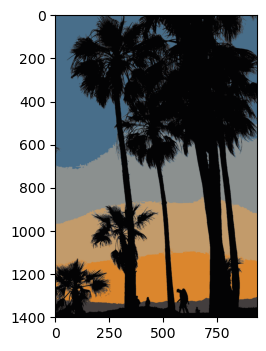

In [37]:
plt.figure(dpi=100)
plt.imshow(quanitized_img);